<a href="https://colab.research.google.com/github/NuryaFahruRosyidin2406/Dicoding_Learn-ML/blob/main/Tugas%20Akhir_Project%20Deploy%20ML%20klasifikasi%20gambar%20hewan%20menggunakan%20TensorFlow%20Lite/Tugas_Akhir_Project_Deploy_ML_klasifikasi_gambar_hewan_air_menggunakan_TensorFlow_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Tugas Akhir Klasifikasi Hewan Air

## Menyiapkan Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Membaca penyimpanan dataset di GitHub

In [2]:
!git clone https://github.com/NuryaFahruRosyidin2406/Dicoding_Learn-ML.git

Cloning into 'Dicoding_Learn-ML'...
remote: Enumerating objects: 28314, done.
remote: Total 28314 (delta 0), reused 0 (delta 0), pack-reused 28314
Receiving objects: 100% (28314/28314), 2.34 GiB | 30.36 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (28181/28181), done.


## Preprocessing Data

1.   Melakukan image augmentation.
2.   Mempersiapkan data latih dan data evaluasi.
3.   Memberi label pada dataset secara otomatis.

In [3]:
TRAINING_DIR = "/content/Dicoding_Learn-ML/Tugas Akhir_Project Deploy ML klasifikasi gambar hewan menggunakan TensorFlow Lite/datasets_buah_segar_dan_busuk/train"
VALIDATION_DIR = "/content/Dicoding_Learn-ML/Tugas Akhir_Project Deploy ML klasifikasi gambar hewan menggunakan TensorFlow Lite/datasets_buah_segar_dan_busuk/test"

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))

Found 10878 images belonging to 6 classes.


## Melihat class nya untuk train

In [4]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_train = train_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_train)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


## Melihat class nya untuk validasi

In [5]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            target_size=(150, 150))

Found 2721 images belonging to 6 classes.


In [6]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_validasi = validation_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_validasi)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


## Memilih kelas-kelas dataset yang akan digunakan

In [7]:
# classes = ['Crabs', 'Dolphin', 'Jelly Fish', 'Sea Urchins', 'Starfish', 'Whale']

## Melihat class nya untuk train dari kelas-kelas dataset yang akan digunakan

In [8]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))
                                                    # classes=classes)

Found 10878 images belonging to 6 classes.


In [9]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_train = train_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_train)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


## Melihat class nya untuk validasi dari kelas-kelas dataset yang akan digunakan

In [10]:
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=32,
                                                            class_mode='categorical',
                                                            target_size=(150, 150))
                                                            # classes=classes)

Found 2721 images belonging to 6 classes.


In [11]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_validasi = validation_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_validasi)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


## Membuat Model

!-- Selanjutnya, buat dan latihlah model menggunakan dataset yang telah kita siapkan sebelumnya. Teknik yang akan digunakan kali ini adalah transfer learning memanfaatkan model `MobileNetV2`. --

In [12]:
# import tensorflow as tf
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (5,5), activation='relu', padding= 'valid', input_shape=(224,224,3)),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.BatchNormalization(),

#     tf.keras.layers.Conv2D(1024, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax'),
# ])

# model.summary()

In [13]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [14]:
# pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
#                                 input_tensor=Input(shape=(150, 150, 3)))

# for layer in pre_trained_model.layers:
#     layer.trainable = False

# last_output = pre_trained_model.output

In [15]:
# x = tf.keras.layers.Flatten(name="flatten")(last_output)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(32, activation="relu")(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dense(128, activation="relu")(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(23, activation='softmax')(x)

# model = tf.keras.models.Model(pre_trained_model.input, x)

# model.summary()

In [16]:
int_lr = 1e-3
num_epochs = 30

optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9999):
      print("\nTarget Akurasi Telah Tercapai")
      self.model.stop_training = True

callbacks = myCallback()

## Melatih Model

In [18]:
H = model.fit(train_generator,
              epochs=num_epochs,
              callbacks=[callbacks],
              validation_data=validation_generator)

Epoch 1/30
340/340 [==============================] - 831s 2s/step - loss: 0.7560 - accuracy: 0.7106 - val_loss: 0.4610 - val_accuracy: 0.8728
Epoch 2/30
340/340 [==============================] - 809s 2s/step - loss: 0.3708 - accuracy: 0.8686 - val_loss: 0.3596 - val_accuracy: 0.8758
Epoch 3/30
340/340 [==============================] - 806s 2s/step - loss: 0.2962 - accuracy: 0.8945 - val_loss: 0.2853 - val_accuracy: 0.8989
Epoch 4/30
340/340 [==============================] - 812s 2s/step - loss: 0.2293 - accuracy: 0.9142 - val_loss: 0.2805 - val_accuracy: 0.8920
Epoch 5/30
340/340 [==============================] - 863s 3s/step - loss: 0.2066 - accuracy: 0.9247 - val_loss: 0.1789 - val_accuracy: 0.9346
Epoch 6/30
340/340 [==============================] - 838s 2s/step - loss: 0.1951 - accuracy: 0.9309 - val_loss: 0.1927 - val_accuracy: 0.9272
Epoch 7/30
340/340 [==============================] - 836s 2s/step - loss: 0.1722 - accuracy: 0.9374 - val_loss: 0.1547 - val_accuracy: 0.9463

### Membuat plot akurasi dari model

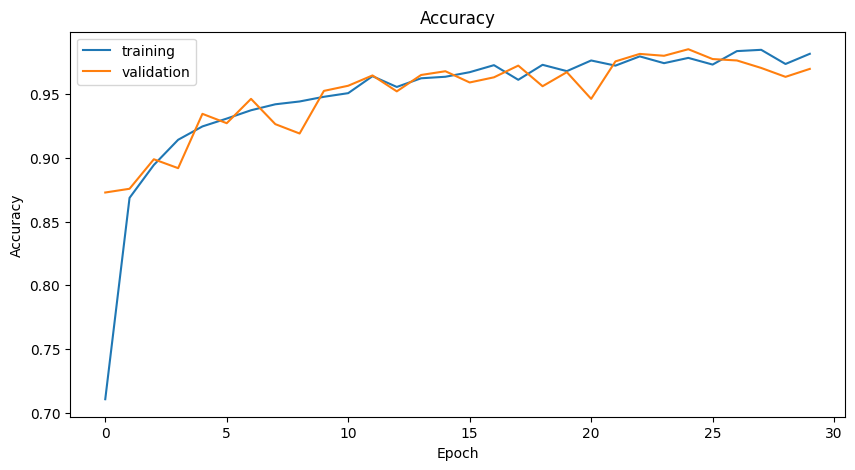

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

### Membuat plot loss dari model

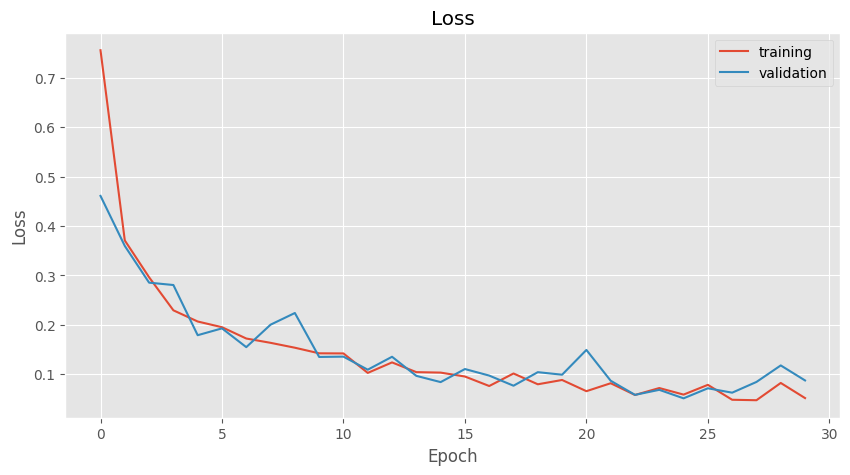

In [20]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

## Mengubah model

### Menyimpan model dalam format SavedModel

In [21]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

### Convert SavedModel menjadi vegs.tflite

In [22]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [23]:
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

38572856